### Import Libraries

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from time import time

### Read Data

In [2]:
df = pd.read_csv("./data/transformed_data.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,song_popularity
0,0.695931,-0.888716,-0.812989,0.190474,-0.382783,0.751246,-0.837637,0.891427,0.763207,-0.676232,1.582272,0.14851,-0.213794,73
1,-0.032349,-0.872681,-0.521989,0.961617,-0.382905,-0.640544,-0.499233,0.316093,-1.310260,-0.479212,-0.545696,0.14851,-0.633572,66
2,0.205064,-0.879827,0.711600,-0.797130,1.476165,-1.475618,0.513914,-0.037518,0.763207,-0.195270,0.095580,0.14851,-0.819243,76
3,-0.032349,-0.818674,-1.097663,1.489242,-0.368141,-1.475618,-0.540585,0.681649,0.763207,0.073218,0.046103,0.14851,-1.327821,74
4,0.078225,-0.904033,-1.122968,0.569281,-0.382905,1.307962,-0.464772,0.650046,0.763207,-0.657882,1.752740,0.14851,0.189839,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,-0.951328,2.088335,-0.787685,-2.204127,-0.382633,1.586320,-0.478556,-2.097722,0.763207,-0.624080,-0.245699,0.14851,-0.916115,60
14922,-0.213087,1.658959,-0.819315,-2.159031,-0.382900,1.586320,-0.519909,-1.592811,-1.310260,-0.669471,-0.923403,0.14851,-1.057387,60
14923,-0.589338,1.934028,0.597730,-1.419456,-0.382905,-1.475618,-0.382066,-1.130951,0.763207,-0.617319,0.324649,0.14851,-0.972624,23
14924,2.138806,2.262769,-0.863598,-1.414946,-0.317609,-0.640544,-0.423419,-1.080684,0.763207,-0.643395,-0.517910,0.14851,-0.823280,55


### GridSeacrhCV Report

In [3]:
# function for performing grid search
def gridSearchReport(estimator, X, y, params, cv=None):
    t0 = time()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train tets split
    
    gridSearchCV = GridSearchCV(
        estimator, 
        param_grid=params, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    gridSearchCV.fit(X_train, y_train)
    
    print("Best parameters:", gridSearchCV.best_params_)
    print("Best CV score:", abs(gridSearchCV.best_score_))
    
    y_train_pred, y_test_pred = gridSearchCV.predict(X_train), gridSearchCV.predict(X_test)
    
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),  # evaluation metrics
          ", ", r2_score(y_train, y_train_pred) )
    
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return gridSearchCV    

### Train-Test Split

In [4]:
X = df.drop(columns=['song_popularity'], axis=1)
y = df['song_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11940, 13), (2986, 13), (11940,), (2986,))

### Linear Regression

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_predicted_train = lr_model.predict(X_train)
y_predicted_test = lr_model.predict(X_test)

<Axes: ylabel='song_popularity'>

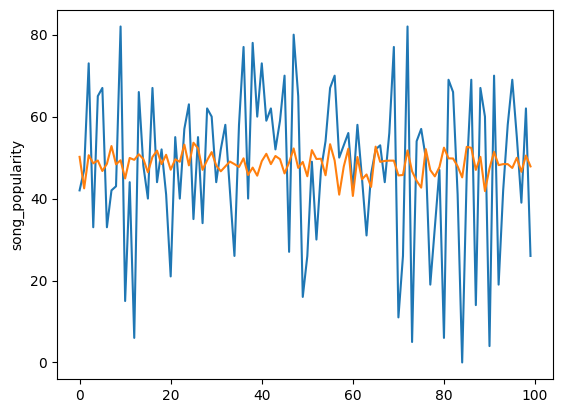

In [7]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100])
sns.lineplot(x=range(len(y_predicted_test[:100])), y=y_predicted_test[:100])

In [8]:
print("Metric on Training Data")
print("MSE:", mean_squared_error(y_train, y_predicted_train))
print("RMSE:", root_mean_squared_error(y_train, y_predicted_train))
print("R2:", r2_score(y_train, y_predicted_train))
print()
print("Metric on Testing Data")
print("MSE:", mean_squared_error(y_test, y_predicted_test))
print("RMSE:", root_mean_squared_error(y_test, y_predicted_test))
print("R2:", r2_score(y_test, y_predicted_test))

Metric on Training Data
MSE: 405.9446643893376
RMSE: 20.148068502696173
R2: 0.023345320270073966

Metric on Testing Data
MSE: 404.25390757824937
RMSE: 20.106066437228574
R2: 0.02221827740469473


### Residual Plot

In [9]:
residuals_train = y_train - y_predicted_train
residuals_test = y_test - y_predicted_test

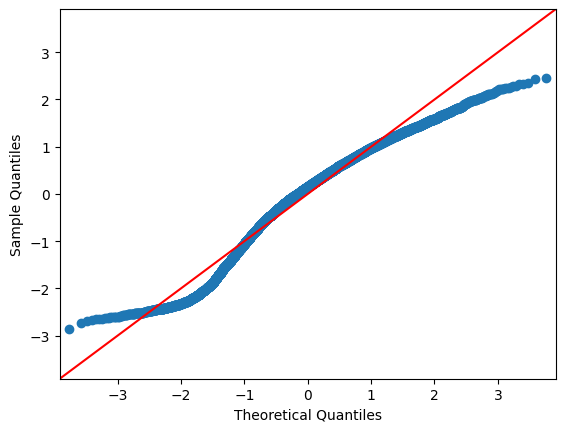

In [10]:
fig = sm.qqplot(
    residuals_train, 
    fit=True, 
    line='45'
)

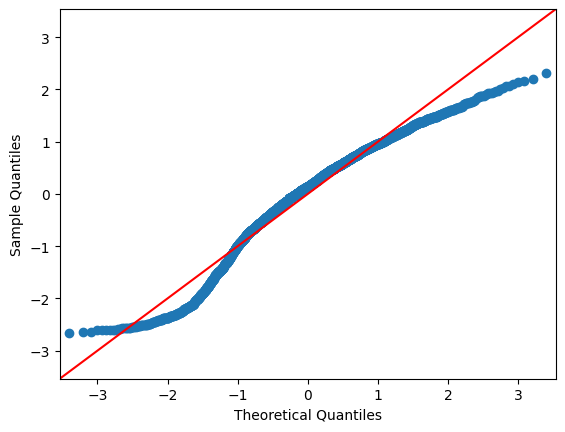

In [11]:
fig = sm.qqplot(
    residuals_test, 
    fit=True, 
    line='45'
)

<Axes: xlabel='song_popularity'>

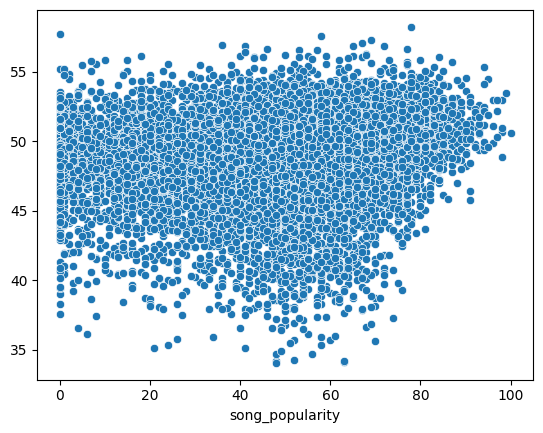

In [12]:
sns.scatterplot(x=y_train, y=y_predicted_train)

<Axes: xlabel='song_popularity'>

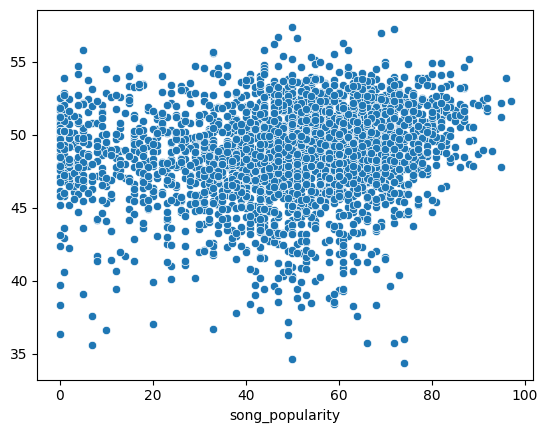

In [13]:
sns.scatterplot(x=y_test, y=y_predicted_test)

### Ridge Regression

In [14]:
ridge_model = gridSearchReport(Ridge(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(327.4549162877732)}
Best CV score: 408.28524244738145
MSE, R2 train: 407.38878430690903 ,  0.02233501534641691
MSE, R2 test: 399.0497982684439 ,  0.025974920606827046
Elapsed time: 1.7 s , 0.03 min


### Lasso Regression

In [15]:
lasso_model = gridSearchReport(Lasso(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(0.001747528400007683)}
Best CV score: 402.6746247366835
MSE, R2 train: 401.8990287825441 ,  0.026265343865711333
MSE, R2 test: 420.7086043181381 ,  0.011270815198782036
Elapsed time: 0.55 s , 0.01 min


### ElasticNet

In [16]:
elasticnet_model = gridSearchReport(ElasticNet(), X, y, params={"alpha": np.linspace(0.1,1,5), "l1_ratio":np.random.rand(20)})

Best parameters: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.12231320299659632)}
Best CV score: 403.4274576198794
MSE, R2 train: 402.36235379033604 ,  0.025155362774218593
MSE, R2 test: 419.2806671645472 ,  0.013418427900927954
Elapsed time: 0.7 s , 0.01 min


From all above regression, we notice very very poor r-square score. This might suggest polynomial relation of features with target.

### Polynomial Regression

In [17]:
degree = 5
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X)

In [18]:
model = LinearRegression()
model.fit(X_poly, y)

# Making predictions
y_poly_pred = model.predict(X_poly)

In [19]:
y_predicted_poly = model.predict(X_poly)

<Axes: ylabel='song_popularity'>

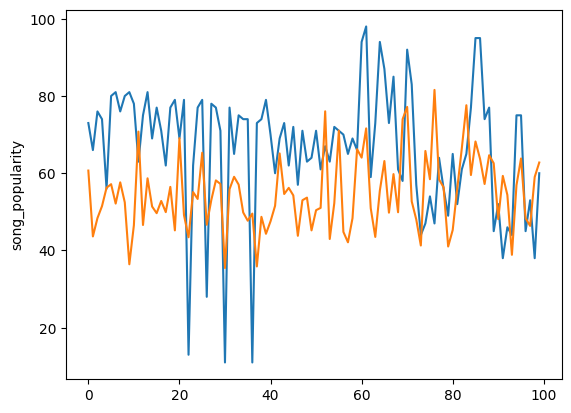

In [20]:
sns.lineplot(x=range(len(y[:100])), y=y[:100])
sns.lineplot(x=range(len(y_predicted_poly[:100])), y=y_predicted_poly[:100])

In [21]:
print("Metrics")
print("MSE:", mean_squared_error(y, y_predicted_poly))
print("RMSE:", root_mean_squared_error(y, y_predicted_poly))
print("R2:", r2_score(y, y_predicted_poly))

Metrics
MSE: 225.017998236314
RMSE: 15.000599929213298
R2: 0.4581728210284014


With limited computational resource at degree=5, we were able to have a much better r-squared at 0.45. But this is still comparatively poor and might suggest overfitting of the model.